# Derivados Financieros 2022 - Clase 3



Plan de la clase:

    1) Binomial  y Black Scholes
    

## 1) Modelo Binomial

In [1]:
import math
import numpy as np

import sys
sys.path.append('..')

from Codigo.opcion_europea_bin import opcion_europea_bin
from Codigo.opcion_europea_bin_c import opcion_europea_bin_c
from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.opcion_europea_bs import opcion_europea_bs



Definicion:
    Calculador del precio de una opcion Europea con el modelo del Arbol Binomial (CRR)

Inputs:
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
    - pasos : int - Cantidad de pasos del arbol binomial

Outputs:
    - precio_BIN: float - Precio del contrato


Black Scholes

Si llegamos hasta aca, entonces estamos en condiciones de ver la formula de Black Scholes. Veremos el modelo en la Clase 4

In [35]:
tipo = "C"
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0

from scipy.stats import norm


In [36]:


#Defino los ds
d1 = (math.log(S / K) + (r - div + 0.5 * sigma * sigma) * T) / sigma / math.sqrt(T)
d2 = (math.log(S / K) + (r - div - 0.5 * sigma * sigma) * T) / sigma / math.sqrt(T)

if tipo == "C":
    precio_BS = math.exp(-div*T) *S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
elif tipo == "P":
    precio_BS = K * math.exp(-r * T) * norm.cdf(-d2) - math.exp(-div*T) * S * norm.cdf(-d1)
    
precio_BS    

12.335998930368717

## Convergencia del Binomial hacia el precio de Black Scholes

In [37]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0.2

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300]      
precios = np.zeros(len(pasos_vec))

for index in range(len(pasos_vec)):
    precios[index] = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
 
precio_BS = opcion_europea_bs(tipo, S, K, T, r, sigma, div)



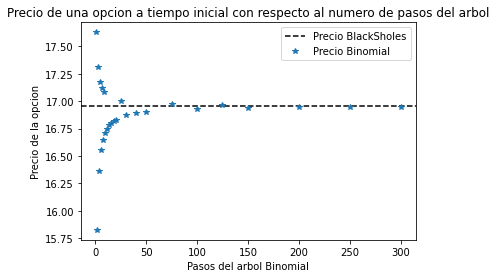

In [38]:
plt.axhline(y=precio_BS, color = 'black', linestyle='--', label='Precio BlackSholes')
plt.plot(pasos_vec,precios,'*', label='Precio Binomial')

plt.legend()

plt.xlabel('Pasos del arbol Binomial')
plt.ylabel('Precio de la opcion')
plt.title('Precio de una opcion a tiempo inicial con respecto al numero de pasos del arbol')

plt.show()

## Convergencia del Binomial (con Americana) hacia el precio de Black Scholes

In [39]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0.

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300]      
precios_eur = np.zeros(len(pasos_vec))
precios_ame = np.zeros(len(pasos_vec))


for index in range(len(pasos_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
    precios_ame[index] = opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
 
precio_BS = opcion_europea_bs(tipo, S, K, T, r, sigma, div)



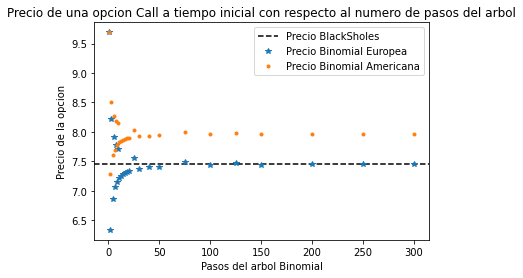

In [40]:
plt.axhline(y=precio_BS, color = 'black', linestyle='--', label='Precio BlackSholes')
plt.plot(pasos_vec,precios_eur,'*', label='Precio Binomial Europea')
plt.plot(pasos_vec,precios_ame,'.', label='Precio Binomial Americana')

plt.legend()

plt.xlabel('Pasos del arbol Binomial')
plt.ylabel('Precio de la opcion')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al numero de pasos del arbol')

plt.show()